In [32]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from collections import defaultdict
import numpy as np

#model = KeyedVectors.load("google.model")


In [33]:
import loadall


In [34]:
model = loadall.m


In [35]:
print(model.relation_names,len(model.relation_names))

['/r/Antonym', '/r/CapableOf', '/r/Causes', '/r/Desires', '/r/DistinctFrom', '/r/Entails', '/r/FormOf', '/r/HasA', '/r/HasProperty', '/r/InstanceOf', '/r/IsA', '/r/PartOf', '/r/RelatedTo', '/r/SimilarTo', '/r/Synonym', '/r/UsedFor', 'co'] 17


In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sample_size_pos = 100
sample_size_neg = 100
emb_size=50
def generatePlots(model):
    for i in range(len(model.R)):#[len(model.R)-1]:#range(len(model.R)):
        embs,embDict = model.getEmbeddingModel(i)
        pos_vecs = []
        neg_vecs = []
        relation = []
        indices = np.arange(len(model.R[i]))
        np.random.shuffle(indices)

        pos = [model.R[i][ind] for ind in indices[:sample_size_pos]]
        for u,v,r in pos:
            pos_vecs +=[embs[u][:50]*embs[v][50:]]
            relation +=["green"]
        rand_pair = np.random.randint(len(embs),size=(2*sample_size_neg,2))
        neg = [tuple(p) for p in rand_pair if tuple(p) not in model.Rpos[i]][:sample_size_neg]
        for u,v in neg:
            neg_vecs +=[embs[u][:50]*embs[v][50:]]
            relation +=["black"]
        tsne=TSNE()
        results=tsne.fit_transform(pos_vecs+neg_vecs)
        x,y=results.T
        plt.scatter(x,y,c=np.array(relation))
        green_patch = mpatches.Patch(color='green', label=model.relation_names[i])
        black_patch = mpatches.Patch(color='black', label='unrelated')
        plt.legend(handles=[green_patch,black_patch])
        counts =len(pos_vecs), len(model.R[i]), len(neg_vecs), len(embs)**2-len(model.R[i])
        plt.title("{}/{} positive samples, {}/{} negative samples".format(*counts))
        #plt.annotate(",".join((words[0],words[1])),xy=results[0])
        plt.show()
        pos_sum = [x.sum() for x in pos_vecs]
        neg_sum = [x.sum() for x in neg_vecs]
        #bins = np.linspace(min(pos_sum+neg_sum), max(pos_sum+neg_sum), 100)
        bins = np.linspace(-1,2, 100) if i<len(model.R)-1 else np.linspace(-.05,.2,100)
        
        plt.hist(pos_sum, bins, alpha=0.5, label=model.relation_names[i], color="green")
        plt.hist(neg_sum, bins, alpha=0.5, label="unrelated", color="black")
        plt.legend(loc='upper right')
        plt.show()
    

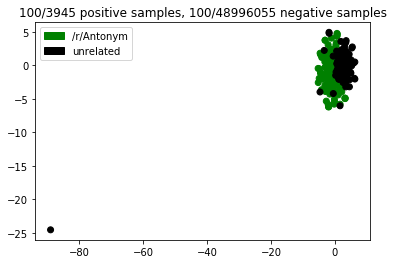

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [42]:
generatePlots(model)

In [38]:
import traingloverel

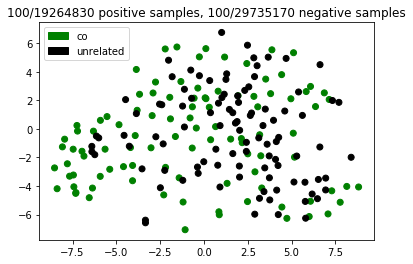

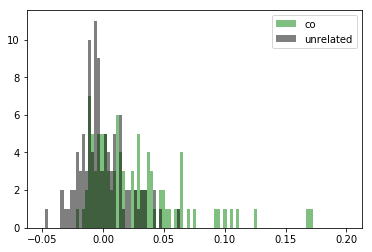

In [39]:
gloveModel = traingloverel.m
generatePlots(gloveModel)

In [20]:
model.estimateLL()

Estimating log likelihood
0 0.6752606665847317
1 0.3894092597245258
2 0.4060752281213325
3 0.6542556542170365
4 0.5888385046646912
5 0.4017185224878522
6 0.7818360195155942
7 0.41266701339372797
8 0.48464197807748416
9 0.7460391126386473
10 0.7806424356343293
11 0.5454390875251917
12 0.8443224133373338
13 0.6038767207508126
14 0.8892825330661864
15 0.5361636126210872
16 0.37650602191011967
-46427.19613231278 0.5951161637806284


(-46427.19613231278, 0.5951161637806284)

In [21]:
gloveModel.estimateLL()

Estimating log likelihood
0 0.3503558002366387
1 0.15566044194265632
2 0.17772530799500752
3 0.256016208855781
4 0.2888531100074406
5 0.20962693877559951
6 0.5664571118180056
7 0.17804619116576284
8 0.17504509516121416
9 0.18995558085515787
10 0.43445839141724524
11 0.25639472344976255
12 0.6294071377026267
13 0.23094490886963545
14 0.8218235642418796
15 0.21279136315101185
16 0.6878983843319736
-124593.47293672903 0.3424388388222


(-124593.47293672903, 0.3424388388222)

In [40]:
word = "garfield"
for i, r in enumerate(model.relation_names):
    print("Best words for word {} and relation {} are {} and {}".format(word, model.relation_names[i], *model.findBest(i, word, 5)))

Best words for word garfield and relation /r/Antonym are ['cat', 'head', 'child', 'union', 'cow'] and ['person', 'capital', 'lady', 'country', 'latter']
Best words for word garfield and relation /r/CapableOf are ['scientist', 'animal', 'statement', 'anyone', 'bell'] and ['lie', 'sleep', 'die', 'state', 'guide']
Best words for word garfield and relation /r/Causes are ['learning', 'reading', 'cooking', 'studying', 'tense'] and ['fun', 'travel', 'suicide', 'energy', 'injuries']
Best words for word garfield and relation /r/Desires are ['people', 'lady', 'saint', 'tree', 'terrorist'] and ['milk', 'control', 'eat', 'mouse', 'happy']
Best words for word garfield and relation /r/DistinctFrom are ['cat', 'head', 'union', 'middle', 'name'] and ['person', 'lady', 'class', 'touch', 'gold']
Best words for word garfield and relation /r/Entails are ['watch', 'survey', 'buy', 'get', 'taste'] and ['remove', 'speak', 'finance', 'kick', 'move']
Best words for word garfield and relation /r/FormOf are ['po